<h3>Lab 4/5: Assignment</h3>

# USA - Australia Comparison on Census Data

---

## Declaration

This declaration should be completed and remain attached to the top of your submission.

*I/we am/are aware of the University’s [policy on academic conduct](https://www.uwa.edu.au/policy/-/media/Project/UWA/UWA/Policy-Library/Policy/Student-Administration/Academic-Integrity/Academic-Integrity-Policy.doc) and I declare that this assignment is entirely the work of the author(s) listed below and that suitable acknowledgement has been made for any sources of information used in preparing it. I have retained a hard copy for my own records.*

- Name 1: Anant Chhabda
- Student ID 1: 21712878
- Name 2:
- Student ID 2:
- Name 3:
- Student ID 3:
- Date: 21/09/2022  

If the assignment was completed in a group, please enter the student numbers in the "StudyBuddy" declaration below:



In [1]:
StudyBuddies = []


<hr>


### CONTEXT



We are going to be analyzing the similarities and differences in Birthplace for people living in Australia and USA. The question I am looking to get an answer for is where do most immigrants living in Australian and USA come from. Also, I want to find the immigration similarities and differences between these two countries \- considering the huge population difference between Australia and USA, and the fact that they are on different sides of the globe, we would expect a disimilar immigrant population distribution between the two countries.

This will also give us an insight about the cultural diversity in these two countries. For the sake of simplicity, we will be extracting the top ten overseas birth places for each country, and to make the data comparable, we will be looking in terms of proportion of the population.


---



### DATA ACQUISITION



The data for Australia will be acquired from Australia Bureau of Statistics which provides the full 2021 census data pack, see link down below. Using the user friendly "Meta\-Data" file, we are interested in the table G10 "Country of Birth of Person by Year of Arrival in Australia \(for persons born overseas\)". This table is best suited for our purpose since we are solely interested in people born overseas. The Data is split by "Year of Arrival in Australia" however we can ignore this and focus on the totals for each country. We would need all three files corresponding to the table G10 which are "2021Census\_G10A\_AUS\_AUS.csv", "2021Census\_G10B\_AUS\_AUS.csv" and "2021Census\_G10C\_AUS\_AUS.csv". Since we want to compare the numbers in proportion to the whole population, we also need the population of the country from the census. This can be obtained again from the Australian Bureau of Statistics, Key Population Statistics from 2021 \- see the second link down below.

[https://www.abs.gov.au/census/find\-census\-data/datapacks](https://www.abs.gov.au/census/find-census-data/datapacks) \(Australian 2021 Census Data\)

[https://www.abs.gov.au/statistics/people/population/population\-census/latest\-release](https://www.abs.gov.au/statistics/people/population/population-census/latest-release) \(Australian 2021 Census Key Population Statistics\)

The census data for USA is still gradually being released and unfortunately for our purpose, we are limited to using American Community Survery data. However it actually works out quite well since we are able to obtain the "2020 American Community Survery 5\-Year Estimated Detailed Table" which is the same time frame that Australia conducts its census i.e. every 5 years. The data will be obtained from United States Census Bureau, in particularly the page "Explore Census Data" which lets us search and download data tables for the topics we are interested in by year, geography etc. The search parameters I have used are **Geography** \-&gt; Nation \-&gt; United States and **Topics** \-&gt; Populations and People \-&gt; Native and Foreign Born \-&gt; Place of Birth. Upon searching, using the tables section, we are interested in B05006 i.e. "PLACE OF BIRTH FOR THE FOREIGN\-BORN POPULATION IN THE UNITED STATES" and in particular selecting from the top scroll down menu "2020 ACS 5\-Year Estimates Detailed Tables". This table can be easily download in CSV format from "More Tools". See link down below for the "Explore Census Data". As before, we need the whole population for USA at the time of release of the particular table that we would be analyzing. This will be best done by extracting the total population from table   
B05002 "PLACE OF BIRTH BY NATIVITY AND CITIZENSHIP STATUS" and again "2020 ACS 5\-Year Estimates Detailed Tables", this can be obtained with the same search parameters.

https://data.census.gov/cedsci/ \(United States Census Bureau \- Explore Census Data\)  



---



### DATA CLEANING/CONVERSION



Firstly, we are going to write a function to clean up the Australian data files. As mentioned before, we only are interested in the total number of people born overseas for each country. Hence, we are going to ignore the data entries which includes year of arrival and only extract the totals. We will store both the "Place of Birth" and "Total Number of People Born" together in a tuple which all collectively will be stored in our final list. 

The function will need to extract the two lines of our files and run through them to preserve the data we need in a temporary tuple. It will need to convert our numerical data to an interger value and then our final list will append these tuples. Finally, it will sort our final list in descending ordeer according to the numerical value in order to give us the top immigrant countries.


Firstly lets define a function to extract total population at the time of ACS release for USA.  



In [2]:
def extract_tot_pop_USA(file):
    with open(file) as f:
        temp = f.read()
        temp_list = temp.split("\n") #split all lines
        for entry in temp_list:
            if ("Total" in entry): #only interested in finding total
                temp_string = entry
                index1 = temp_string.find('"')

                #recursively remove double quotes and commas between them
                while(index1 != -1):
                    index2 = temp_string.find('"', index1 +1)
                    temp_string2 = temp_string[index1+1:index2].replace(",", "")
                    temp_string3 = temp_string[:index1] + temp_string2 + temp_string[index2+1:]
                    temp_string = temp_string3
                    index1 = temp_string.find('"')

                temp_list2 = temp_string.split(",") #clean list obtained to extract total population
                for item in temp_list2:
                    if(item.isdigit()):
                        total_pop = int(item) #the first numerical entry will be total population
                        break
                break #stop the loop since we got the required entry
    return total_pop

Lets define our essential constants.


In [3]:
AU_FILE_1 = "2021Census_G10A_AUS_AUS.csv"
AU_FILE_2 = "2021Census_G10B_AUS_AUS.csv"
AU_FILE_3 = "2021Census_G10C_AUS_AUS.csv"

USA_FILE = "ACSDT5Y2020.B05006-2022-09-21T114433.csv"
USA_FILE_TOTAL_POP = "ACSDT5Y2020.B05002-2022-09-21T090706.csv"

TOTAL_POP_AU = 25422788 #obtained from source described in context
TOTAL_POP_USA = extract_tot_pop_USA(USA_FILE_TOTAL_POP)

A function to extract data for Australia.  



In [4]:
def clean_au(file):
    au_list = []

    with open(file) as f:
        country_list = f.readline().split(",")
        numbers_list = f.readline().split(",")

        #go through the data entries
        for i in range(len(country_list)):

            #extract the totals as needed
            index = country_list[i].find("_Tot")
            if (index != -1):
                temp_name = country_list[i][:index].replace("_", " ")
                if (temp_name.startswith("China")):
                    temp_name = "China" #enhancing readibility
                elif (temp_name.startswith("Hong Kong")):
                    temp_name = "Hong Kong" #enhancing readibility
                elif ("Tot" in temp_name):
                    temp_name = "Overseas Born" #create an entry for total overseas born 
                elif ("Born" in temp_name or "Not" in temp_name):
                    continue #skip the non relevant data entries 
                my_tuple = (temp_name, int(numbers_list[i])) #convert numerical entry to integer
                au_list.append(my_tuple)

        return au_list

def combine_and_sort(listoflists):

    temp = listoflists
    final_list = []
    for data_list in temp:
        final_list = final_list + data_list #combine all lists extracted from the data files

    #now lets sort so we have our top overseas birth places at the top
    sorted_list = sorted(final_list, key = lambda a:a[1], reverse = True)

    return sorted_list

A function to extract data for USA.  



In [5]:
def clean_usa(file):
    with open(file) as f:
        temp_file = f.read() #reads the entire content of the file
        temp_file_list = temp_file.split("\n") #splits all lines 
        file_list = temp_file_list[1:] #skip the header line 
        final_list = []
        my_list = []
        for line in file_list:
            if (":" in line or "Other" in line or "Europe" in line): #ignore non essential, we are only interested in countries
                continue
            temp_line = line.replace(u"\xa0",'') #getting rid of non breaking spaces
            index1 = temp_line.find('"')

            #recursively find double quotes to clean data and make numerical figure extractable
            while(index1!=-1):
                index2 = temp_line.find('"',index1+1)
                temp_line2 = temp_line[index1+1:index2].replace(",", "")
                temp_line3 = temp_line[:index1] + temp_line2 + temp_line[index2+1:]
                temp_line = temp_line3
                index1 = temp_line.find('"')

            #out of the recursive loop, we have a clean line stored in temp_line
            temp_list = temp_line.split(",")
            temp_name = temp_list[0]
            temp_number = int(temp_list[1])

            #make data more readable
            if (temp_name.startswith("China")):
                temp_name = "China"
            elif(temp_name.startswith("United Kingdom")):
                temp_name = "United Kingdom"
            pair = (temp_name, temp_number)
            final_list.append(pair)

        #Note: USA data provides United Kingdom, England and Scotland seperately.
        #We will combine them in one to match Australian data.
        #Also add the total overseas born

        country_name = "United Kingdom"
        country_number = 0
        clean_list = []
        clean_list.append(("Overseas Born", extract_tot_pop_USA(USA_FILE)))

        for pair in final_list:
            if (pair[0] == "Scotland" or pair[0] == "United Kingdom" or pair[0] == "England"):
                country_number = country_number + pair[1]
            else:
                clean_list.append(pair)
        clean_list.append((country_name, country_number))

        return clean_list

Finally, we can use our functions to extract the clean analyzable data.  



In [6]:
#Extract clean data for Ausralia
au_list_1 = clean_au(AU_FILE_1)
au_list_2 = clean_au(AU_FILE_2)
au_list_3 = clean_au(AU_FILE_3)
au_final_list = combine_and_sort([au_list_1,au_list_2,au_list_3])

#Extract clean data for USA
usa_list = clean_usa(USA_FILE)
usa_final_list = combine_and_sort([usa_list])

#Define some more constants for natively born population

NATIVELY_BORN_POP_AU = TOTAL_POP_AU - au_final_list[0][1]
NATIVELY_BORN_POP_USA = TOTAL_POP_USA - usa_final_list[0][1]

---



### DATA ANALYSIS/INTERPRETATION



We wil now write a function to create a new list for both the countries which contain proportions instead of number of people, this wil help us to compare the countries better since the difference in population size is quite enormous before Australia and USA. The proportions are with respect to the populations of the countries and converted into a percentage. The function will also convert our tuples into a list giving us a list of lists, we will take the top 10 countries along with the category "Overseas Born". 

We will also write another small function to print us the table of proportions of each immigrant country so that we can clearly see their distribution.


In [7]:
def convert_to_proportions(data_list, total_pop):
    new_data_list = []

    for i in range(len(data_list)):
        new_data_list.append([data_list[i][0], round((data_list[i][1]/total_pop)*100,1)]) #convert to proportion
    return new_data_list[:11]

au_top_10 = convert_to_proportions(au_final_list, TOTAL_POP_AU) #create clean au top 10 countries with proportions
usa_top_10 = convert_to_proportions(usa_final_list, TOTAL_POP_USA) #create clean usa top 10 countries with proportions 

def print_table(au_list,nz_list):
    print("{:<27} {:<27} {:<27} {:<27}".format('    Proportions for Australia','', '     Proportions for USA', '')) #format for the table
    for i in range(len(au_list)):
        a, b = au_list[i]
        b = str(b) + '%'
        c, d = nz_list[i]
        d = str(d) + '%'
        print("{:<27} {:<27}".format(a,b), "{:<27} {:<27}".format(c,d))

print_table(au_top_10, usa_top_10)

    Proportions for Australia                                  Proportions for USA                               
Overseas Born               27.7%                       Overseas Born               13.5%                      
United Kingdom              4.4%                        Mexico                      3.3%                       
India                       2.6%                        India                       0.8%                       
China                       2.2%                        China                       0.7%                       
New Zealand                 2.1%                        Philippines                 0.6%                       
Philippines                 1.2%                        El Salvador                 0.4%                       
Vietnam                     1.0%                        Vietnam                     0.4%                       
South Africa                0.7%                        Cuba                        0.4%              

As expected, the distribution is indeed quite different between the two countries. Australia has more than double the overseas born population proportionately compared to the USA. It is not suprising to see that India and China are at the very top considering they have the largest populations in the world. Based on the distributions above, it does seem that Australia has much more diversity in its population. 

Before we can visualise the data, we need to write two small functions to gather the date in the appropriate order for visualisation. We will be using two charts to get a better understanding of our comparison, a bar chart and a pie chart. The bar chart will be comparing overseas born vs natively born for the two countries and the pie chart will give us the relative proportions of the immigrant countries.  


Our bar chart function will create two lists for each country and so will our pie chart function, the content in our lists will be as per our requirements mentioned above.



In [8]:
def bar_chart_lists(data_list, native_born_pop, total_pop):
    birth_place = []
    num_people = []

    birth_place.append("Natively Born")
    proportion_1 = (native_born_pop/total_pop)*100 #convert to proportion
    num_people.append(round(proportion_1,3))
    birth_place.append(data_list[0][0]) #extract overseas born
    proportion_2 = (data_list[0][1]/total_pop)*100
    num_people.append(round(proportion_2,3))

    return birth_place, num_people

def pie_chart_lists(top_10_list):
    country_list = []
    number_list = []

    for i in range(1,len(top_10_list)): #ignore overseas born, only considering top 10 countries
        country_list.append(top_10_list[i][0])
        number_list.append(top_10_list[i][1])

    return country_list, number_list

#create au, usa lists for bar chart
au_barplot_birth, au_barplot_people = bar_chart_lists(au_final_list, NATIVELY_BORN_POP_AU, TOTAL_POP_AU)
usa_barplot_birth, usa_barplot_people = bar_chart_lists(usa_final_list, NATIVELY_BORN_POP_USA, TOTAL_POP_USA)

#create au, usa lists for pie chart
au_pieplot_birth, au_pieplot_people = pie_chart_lists(au_top_10)
usa_pieplot_birth, usa_pieplot_people = pie_chart_lists(usa_top_10)

---



### DATA VISUALISATION



In [9]:
import matplotlib.pyplot as plt

We will now construct a bar chart visualising the proportion of overseas born vs natively born for the two countries.  



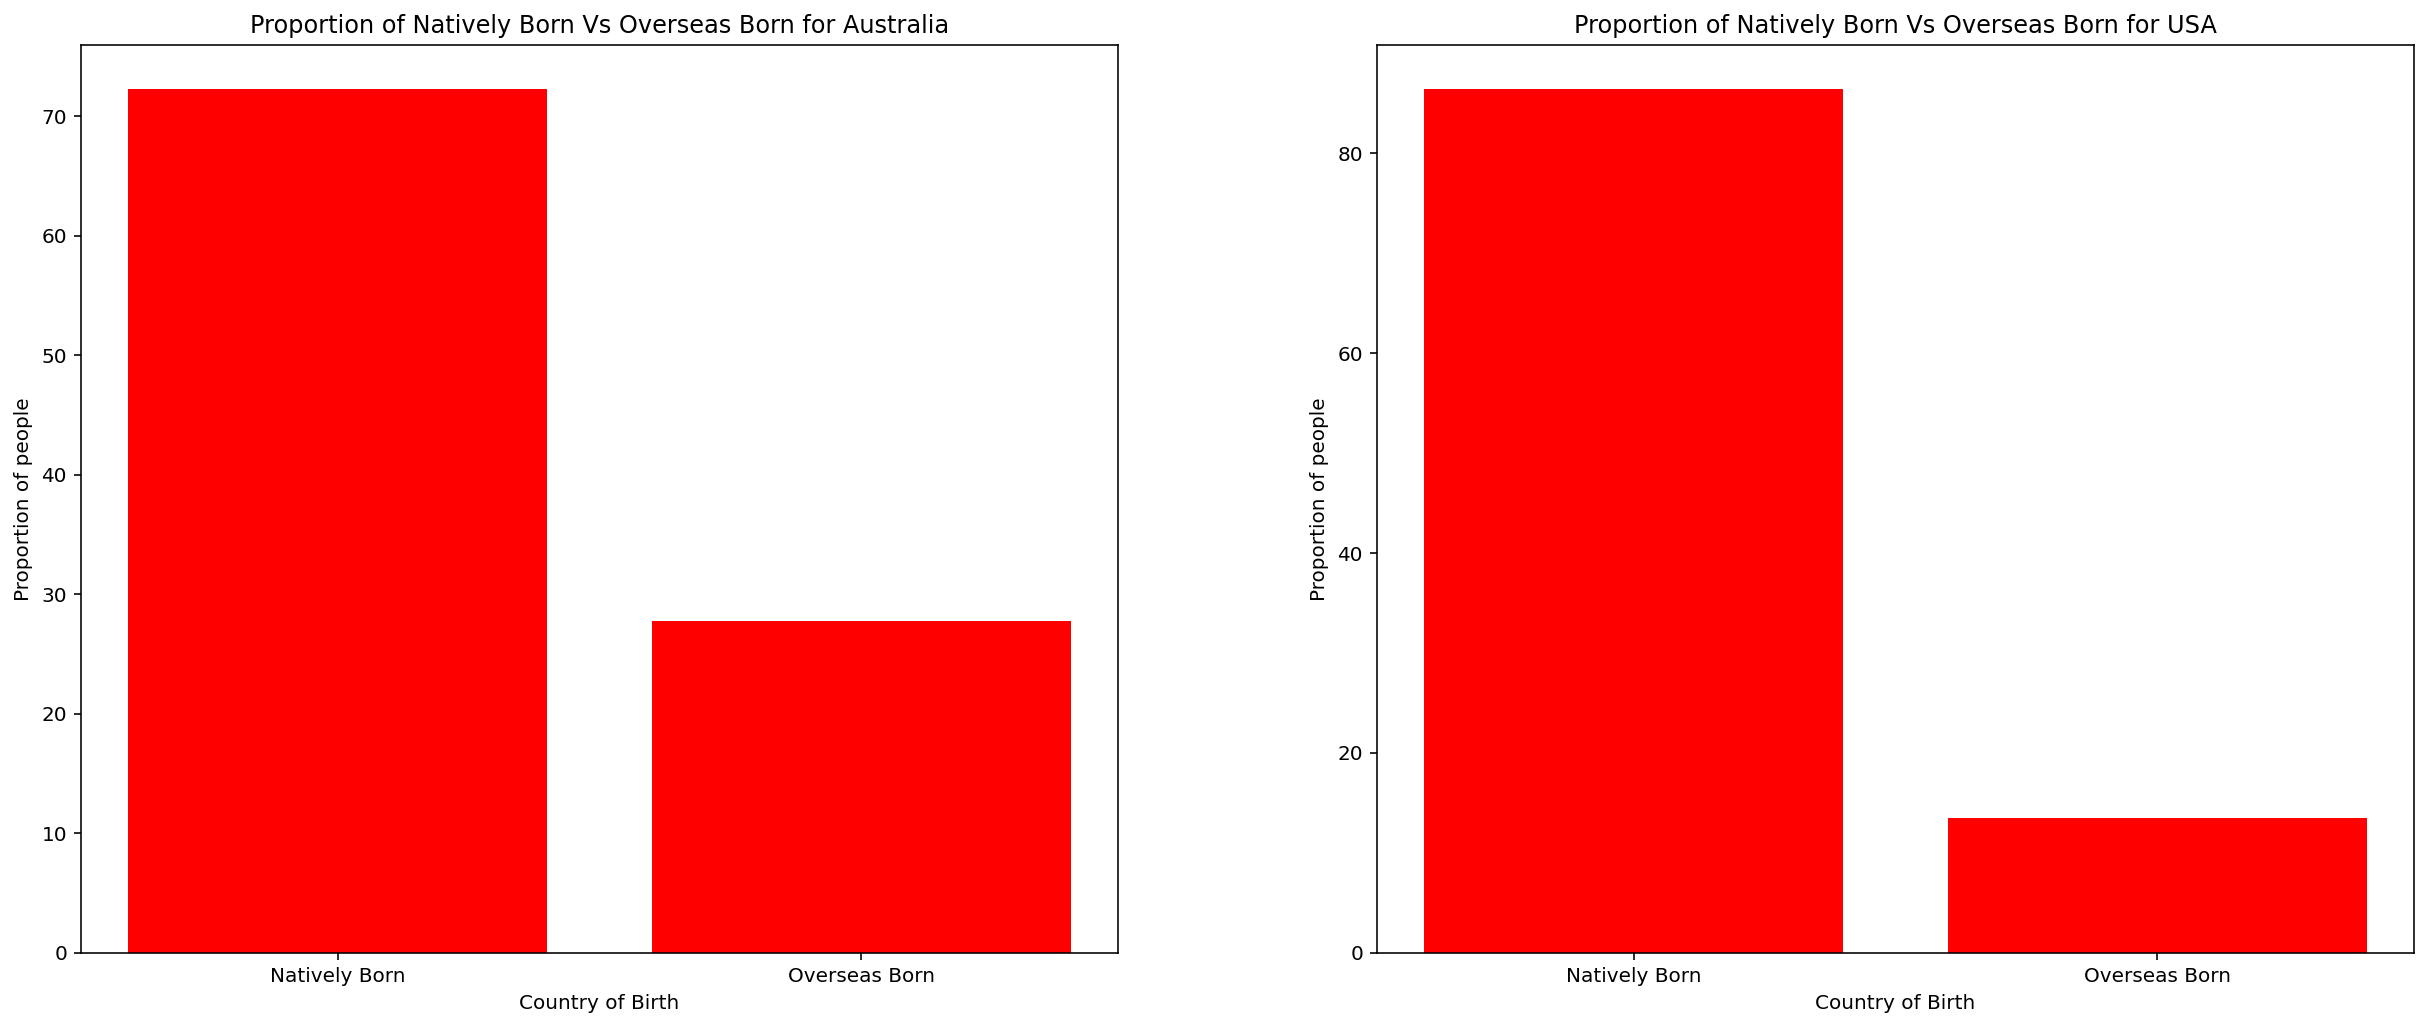

In [10]:
plt.axes([0.05,0,0.6,0.9]) #axes for au plot
plt.bar(au_barplot_birth, au_barplot_people, color = "red")
plt.xlabel("Country of Birth")
plt.ylabel("Proportion of people")
plt.title("Proportion of Natively Born Vs Overseas Born for Australia")

plt.axes([0.8,0,0.6,0.9]) #axes for usa plot
plt.bar(usa_barplot_birth, usa_barplot_people, color = "red")
plt.xlabel("Country of Birth")
plt.ylabel("Proportion of people")
plt.title("Proportion of Natively Born Vs Overseas Born for USA")

plt.show()

As we have previously gathered from our table, Australia has a lot more overseas born population \(in proportion\) compared to the USA. The difference is apparent and visualising through the bar chart does put it into perspective. Comparing overseas born to each countries natively born population, Australia does seem to being doing a lot better in terms of cultural diversity.  


We will now be creating a pie chart which is much better suited to give us an idea about the proportions of the top 10 immigrant countries for Australia and USA.


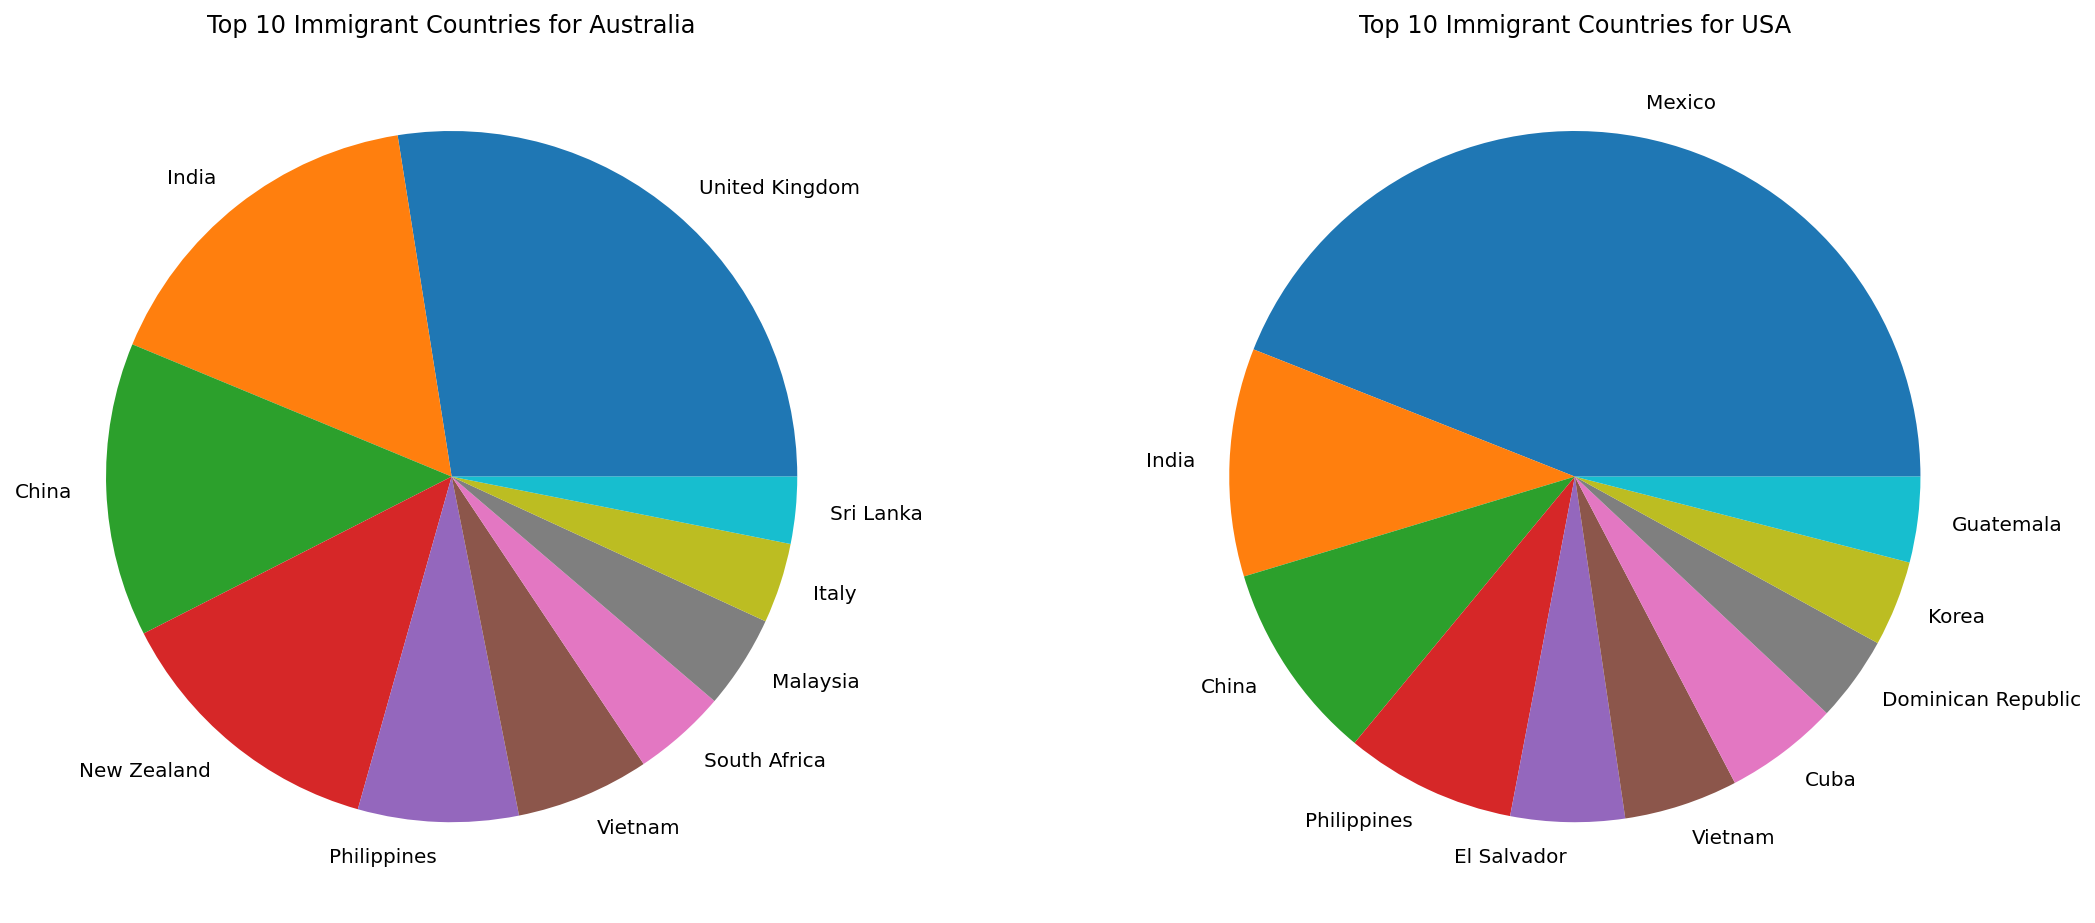

In [11]:
plt.axes([0.05,0,0.5,1]) #axes for au plot
plt.pie(au_pieplot_people, labels = au_pieplot_birth)
plt.title("Top 10 Immigrant Countries for Australia")

plt.axes([0.7,0,0.5,1]) #axes for nz plot
plt.pie(usa_pieplot_people, labels = usa_pieplot_birth)
plt.title("Top 10 Immigrant Countries for USA")

plt.show()

There are definitely some interesting similarities and differences displayed in the pie chart above. 

Most of the people who have immigrated to Australia have come from United Kingdom whereas for USA, they have come from Mexico. This isn't suprising considering the history of Australia and the close proximity of USA and Mexico.

From above, we can also see some similarity in the overseas born population. India, China, Phillipines and Vietnam are the top common ones for both countries and suprisingly, in more or less the same order. If we shift our focus on the basis of continent, we can see that people from Asia have immigrated the most to Australia. Compare that to the USA, where people from North America have immigrated the most.  



---



### CONCLUSION



In conlusion, we were able to find out that most immigrants living in Australia have come from the United Kingdom whereas for USA, they have come from Mexico. We also found some similarities in immigration to Australia and USA mostly related to countries in Asia. Overall, Australia seems to have a lot more cultural diversity \(in proportion\) to the USA.
